In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from transformers import AutoTokenizer

import sys

sys.path.append("..")
from src.model import WineBert

In [2]:
# Load checkpoint
wine_bert = WineBert.load_from_checkpoint("../models/bert-mini-finetune.ckpt")

Some weights of the model checkpoint at google/bert_uncased_L-4_H-256_A-4 were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification w

In [3]:
bert_classifier = wine_bert.model
bert_classifier.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 256, padding_idx=0)
      (position_embeddings): Embedding(512, 256)
      (token_type_embeddings): Embedding(2, 256)
      (LayerNorm): LayerNorm((256,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=256, out_features=256, bias=True)
              (key): Linear(in_features=256, out_features=256, bias=True)
              (value): Linear(in_features=256, out_features=256, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=256, out_features=256, bias=True)
              (LayerNorm): LayerNorm((256,), eps=1e-12, element

In [4]:
bert = bert_classifier.bert
classifier = bert_classifier.classifier

In [5]:
bert

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 256, padding_idx=0)
    (position_embeddings): Embedding(512, 256)
    (token_type_embeddings): Embedding(2, 256)
    (LayerNorm): LayerNorm((256,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=256, out_features=256, bias=True)
            (key): Linear(in_features=256, out_features=256, bias=True)
            (value): Linear(in_features=256, out_features=256, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=256, out_features=256, bias=True)
            (LayerNorm): LayerNorm((256,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

In [6]:
bert.encoder.layer[3].output

BertOutput(
  (dense): Linear(in_features=1024, out_features=256, bias=True)
  (LayerNorm): LayerNorm((256,), eps=1e-12, elementwise_affine=True)
  (dropout): Dropout(p=0.1, inplace=False)
)

In [7]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

In [8]:
text = "The deep red-black color reaches from core to rim. The fragrant nose centers around hot chocolate and candied cherries. Dry on the attack with adequate acidity, the wine shows moderate extraction and medium alcohol that lead to a short finish."
inputs = tokenizer(text, return_tensors="pt")

In [9]:
inputs

{'input_ids': tensor([[  101,  1996,  2784,  2417,  1011,  2304,  3609,  6561,  2013,  4563,
          2000, 11418,  1012,  1996, 25312, 18980,  4451,  6401,  2105,  2980,
          7967,  1998, 27467,  2098, 24188,  5134,  1012,  4318,  2006,  1996,
          2886,  2007, 11706,  5648,  3012,  1010,  1996,  4511,  3065,  8777,
         14676,  1998,  5396,  6544,  2008,  2599,  2000,  1037,  2460,  3926,
          1012,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1]])}

In [10]:
inputs["input_ids"].shape

torch.Size([1, 52])

In [11]:
def convert_id_to_vocab(tokenizer, input_ids):
    vocab = tokenizer.get_vocab()
    id_to_token = {v: k for k, v in vocab.items()}
    tokens = []
    for row in input_ids:
        token = [id_to_token[int(i)] for i in row]
        tokens += [token]
    return tokens

In [12]:
tokens = convert_id_to_vocab(tokenizer, inputs["input_ids"])

In [13]:
output = bert(**inputs)

In [14]:
output

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[-1.1698, -0.6812,  0.4613,  ...,  0.5151,  0.5006, -0.4524],
         [-1.8724, -0.8934,  1.2267,  ..., -0.7405,  0.1288, -2.2521],
         [ 0.0290, -0.3335,  0.5898,  ...,  1.1127,  0.1469, -0.9737],
         ...,
         [ 0.0621, -0.0561,  1.3614,  ...,  1.2573,  0.1305, -1.2296],
         [-0.3848, -0.4755,  0.7629,  ...,  0.9349,  0.3439, -0.5901],
         [-1.5469, -0.7537,  0.9267,  ..., -0.2165,  0.7236, -0.5530]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[-0.9571, -0.8636,  1.0000,  0.9916,  0.9923, -0.4283,  0.9444,  0.1384,
         -0.9982, -0.9887,  0.2863, -0.8664, -0.2668, -0.9997,  0.9876,  0.9876,
         -0.3717, -0.4933,  1.0000,  0.9993,  1.0000, -0.9908, -0.9174, -0.9979,
         -1.0000, -0.8681,  0.9989,  0.9967,  0.5909, -0.9992, -0.9999, -0.9990,
          0.0474, -0.9353,  0.9958,  0.9988, -0.2013,  0.9997,  0.9948,  0.9409,
         -0.9574,  0.5177,  0.99

In [15]:
output.last_hidden_state.shape

torch.Size([1, 52, 256])

In [16]:
class LayerHook:
    def __init__(self, model, target_layers):
        self.model = model
        self.backwards = []
        self.forwards = []
        self.hooks = []
        for layer in target_layers:
            self.hooks += [layer.register_forward_hook(self.save_forward)]
            self.hooks += [layer.register_full_backward_hook(self.save_backward)]

    def save_forward(self, module, input, output):
        self.forwards += [output[0].cpu().detach()]

    def save_backward(self, module, grad_input, grad_output):
        self.backwards = [grad_output[0].cpu().detach()] + self.backwards

    def __call__(self, **kwargs):
        self.backwards = []
        self.forwards = []
        return self.model(**kwargs)

    def release(self):
        [hook.remove() for hook in self.hooks]

In [17]:
layerhook = LayerHook(bert_classifier, [bert.encoder.layer[3]])

In [18]:
output = layerhook(**inputs)
output

SequenceClassifierOutput(loss=None, logits=tensor([[-2.3193, -1.5638, -5.0269,  0.3760,  0.4918,  2.4069,  0.7228, -2.3692,
          0.5980,  0.0384, -3.5180, -0.2821, -0.8943, -0.4765,  0.5265,  3.6653,
          4.9975,  1.7904,  0.9448,  1.6260, -1.3697, -2.7034,  2.0426, -1.5378,
         -4.4881,  2.3913,  4.5066, -0.4443,  1.6163, -0.3522, -2.0288, -3.0665,
         -0.9385, -1.0246,  2.2376,  0.9653, -1.8527, -2.1235, -2.2957, -7.8667,
         -0.0770, -1.7809, -1.5241,  0.0307, -3.6431,  0.2577,  1.0655, -3.1731,
         -0.1267, -2.7269,  0.7741, -2.6058, -1.6487,  0.4509, -7.0819,  0.0209,
          1.7495,  0.5095, -1.8496, -0.1983, -3.1522, -0.4317, -2.1152, -0.0202,
         -0.4434,  0.7186,  5.1572, -1.0156, -1.6430,  2.0756,  0.1126, -1.3178,
          2.9168, -1.1658, -1.5285, -0.5232, -1.7855,  1.9928, -0.1444,  2.1212,
         -2.1124, -3.4163,  0.4809,  0.0475, -1.0373,  1.7571,  2.1534, -3.4781,
          0.4077,  3.0889,  4.0471,  3.8213, -0.1193, -5.5892, -0.

In [19]:
layerhook.forwards[0].shape

torch.Size([1, 52, 256])

In [20]:
class GradCAMForBert:
    def __init__(self, model, targer_layers):
        self.model = model
        self.model.eval()
        self.target_layers = targer_layers
        self.layer_hook = LayerHook(model, targer_layers)

    def __call__(self, inputs, target_category=None):
        # Forward
        input_tensor = inputs["input_ids"]

        output = self.layer_hook(**inputs)
        logits = output.logits

        if isinstance(target_category, int):
            target_category = [target_category] * input_tensor.size(0)

        if target_category is None:
            target_category = np.argmax(logits.cpu().detach().numpy(), axis=-1)
            print(
                f"target_category not provided, use top 1 predictions: {target_category}"
            )

        # Backward
        self.model.zero_grad()
        loss = 0
        for i, c in enumerate(target_category):
            loss = loss + logits[i, c]
        loss.backward(retain_graph=True)

        # Calculate GradCAM
        cams = []

        forwards, backwards = self.layer_hook.forwards, self.layer_hook.backwards
        for f, b in zip(forwards, backwards):
            weight = np.mean(b.numpy(), axis=2, keepdims=True)  # b is grad
            weight_f = weight * f.numpy()
            cam = weight_f.sum(axis=2)
            cam[cam < 0] = 0  # ReLU
            cams += [cam, cam]
        cams = np.stack(cams, axis=0)
        cams = cams.mean(axis=0)

        return cams

In [21]:
gradcam = GradCAMForBert(bert_classifier, [bert.encoder.layer[2]])

In [22]:
def aggregate_wordpiece(token, cam, remove_cls_sep=True):
    agg = []
    cur_tc = None
    for t, c in zip(token, cam):
        if t.startswith("##"):
            cur_tc[0] += t[2:]
            cur_tc[1] + c
        else:
            if cur_tc is not None:
                agg += [tuple(cur_tc)]
            cur_tc = [t, c]
    agg += [tuple(cur_tc)]
    if remove_cls_sep:
        agg = agg[1:-2]
    return agg

In [23]:
def plot_cam(token, cam, agg_wordpiece=True, remove_cls_sep=True):
    plt.figure(figsize=(15, 10))
    if agg_wordpiece:
        agg = aggregate_wordpiece(token, cam, remove_cls_sep)
        token, cam = list(zip(*agg))
    pos = range(len(cam))
    plt.bar(pos, cam)
    plt.xticks(pos, token, rotation=90)

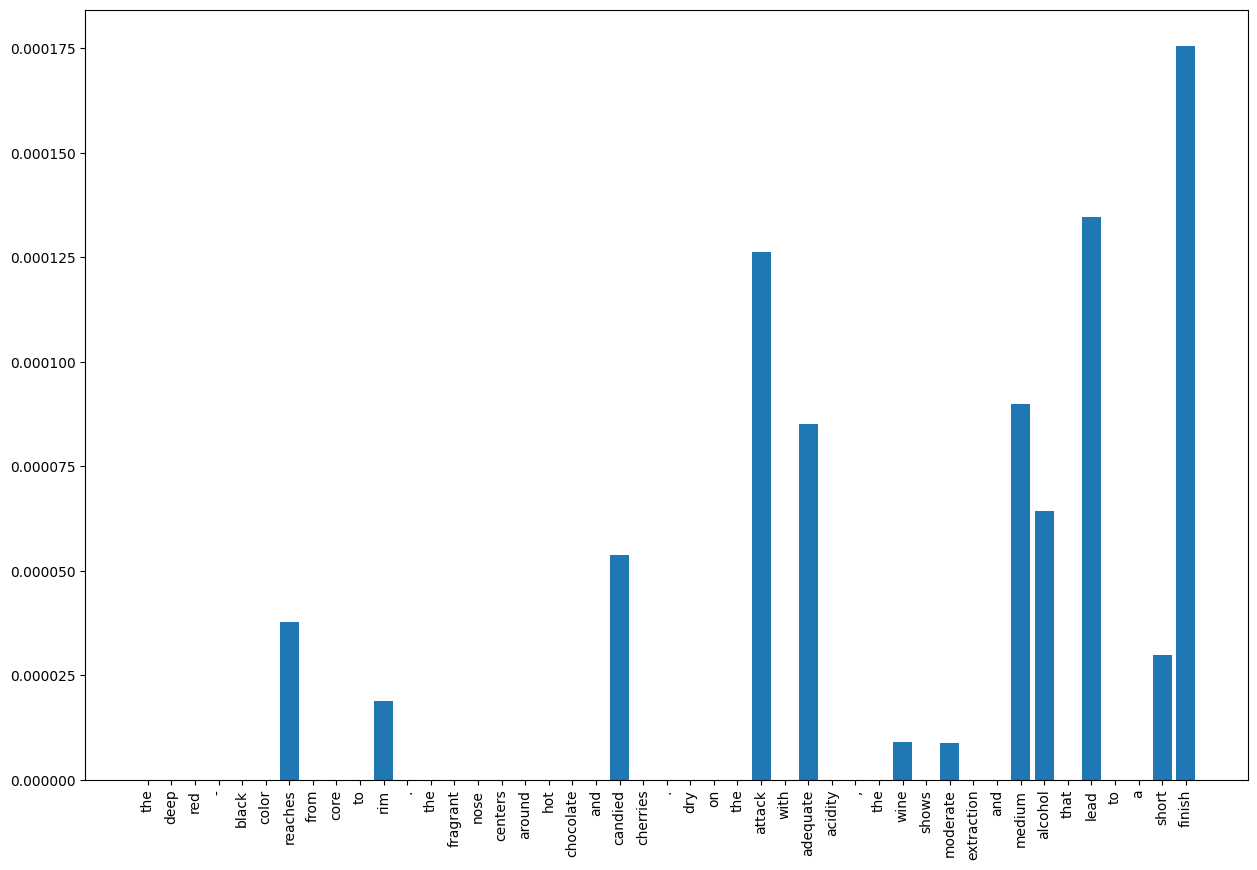

In [24]:
cams_true_label = gradcam(inputs, target_category=265)
plot_cam(tokens[0], cams_true_label[0])

target_category not provided, use top 1 predictions: [441]


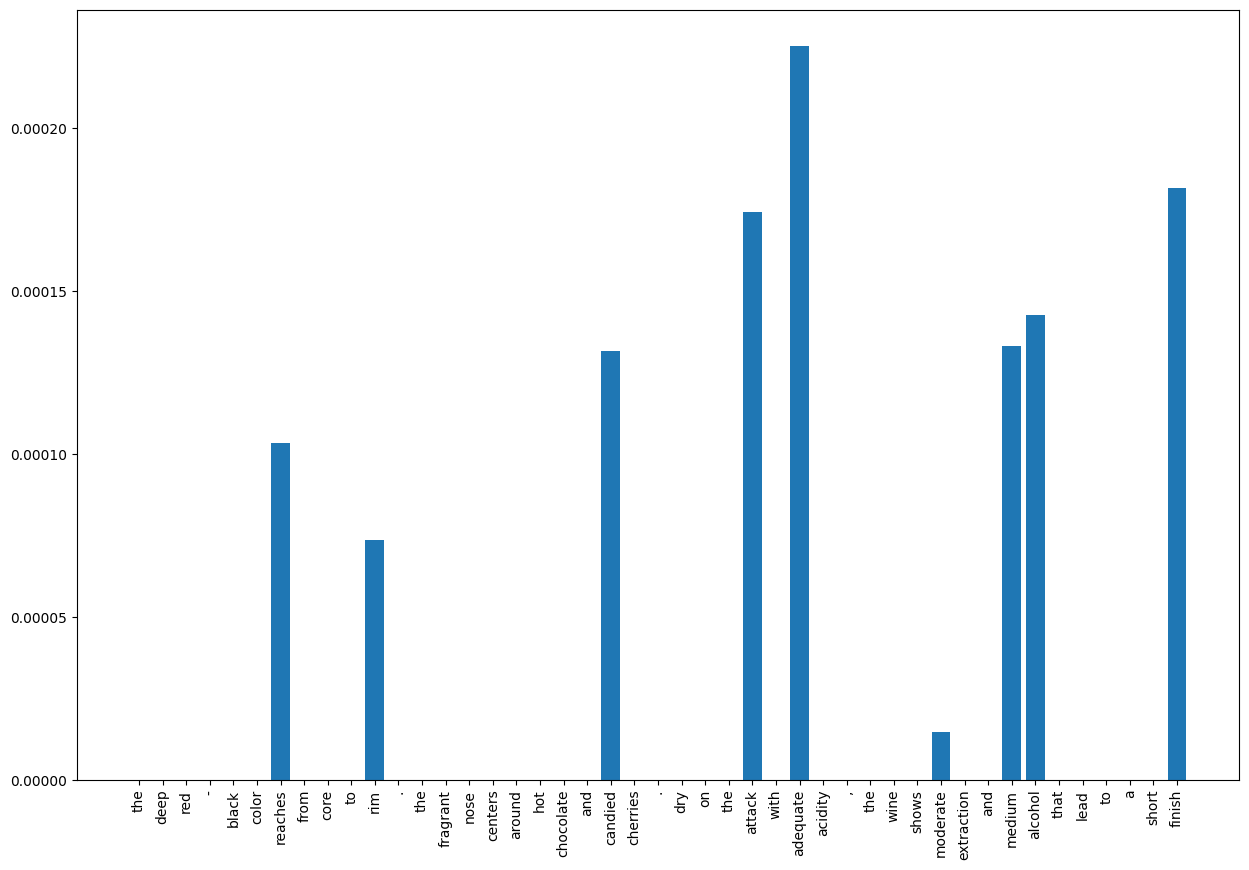

In [25]:
cams_top1 = gradcam(inputs, target_category=None)
plot_cam(tokens[0], cams_top1[0])